# 📌 Churn Prediction Overview

Churn prediction is the process of identifying customers who are likely to stop using a product or service. It helps businesses act early and reduce customer loss.

### Why It’s Important

* Retaining customers is cheaper than acquiring new ones.

* Helps teams understand why people leave.

* Supports targeted retention campaigns.

* Improves product quality and customer experience.

### Where It’s Used

* Telecom companies (customers switching to other networks)

* Banks and insurance firms

* E-commerce platforms

* Subscription and SaaS products

* Streaming platforms

### How It Works

* Collect customer data
Usage history, complaints, payments, demographics, activity logs.

* Preprocess the data
Handle missing values, encode categorical variables, scale numeric features.

* Create meaningful features
Examples: last login, contract type, number of purchases, spending patterns, customer lifetime.

* Train a machine learning model
Common models: Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost, CatBoost.

* Evaluate the model
Use metrics like precision, recall, F1-score, ROC-AUC due to class imbalance.

* Predict churn probability
Each customer receives a score showing the chance they might leave.

### Typical Indicators of Churn

* Decrease in usage

* High bills or high service cost

* Multiple complaints

* No recent activity or transactions

* Non-renewal of subscription

* Switching to monthly plans from annual

### Business Actions After Prediction

* Targeted discounts

* Personalized offers

* Better customer support

* Feedback surveys

* Loyalty rewards

#### 1. Import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



#### 2. Data Loading and Understanding

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df.sample(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
933,4750-ZRXIU,Female,1,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,360.1,Yes
2006,0224-HJAPT,Male,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,47.15,223.15,Yes


In [ ]:
#checking datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# dropping customer_id column as it is not required for modeling
df.drop("customerID",axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#printing the unique values in all categorical columns

numerical_features=["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
  if col not in numerical_features:
    print(f"{col}:{df[col].unique()}\n")
    print("-"*50)

gender:['Female' 'Male']

--------------------------------------------------
SeniorCitizen:[0 1]

--------------------------------------------------
Partner:['Yes' 'No']

--------------------------------------------------
Dependents:['No' 'Yes']

--------------------------------------------------
PhoneService:['No' 'Yes']

--------------------------------------------------
MultipleLines:['No phone service' 'No' 'Yes']

--------------------------------------------------
InternetService:['DSL' 'Fiber optic' 'No']

--------------------------------------------------
OnlineSecurity:['No' 'Yes' 'No internet service']

--------------------------------------------------
OnlineBackup:['Yes' 'No' 'No internet service']

--------------------------------------------------
DeviceProtection:['No' 'Yes' 'No internet service']

--------------------------------------------------
TechSupport:['No' 'Yes' 'No internet service']

--------------------------------------------------
StreamingTV:['No' 'Yes' 'N

In [ ]:
#checking fo null values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
#Let's check TotalCharges column
df["TotalCharges"].unique()



array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
len(df[df["TotalCharges"]==" "])

11

In [ ]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})

#conerting it into float

df["TotalCharges"]=df["TotalCharges"].astype("float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#let's check class distribution of target column

df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


 *Insights*
 * We have dropped Customer_Id column as we does not required in data modeling.
 * There is no missing value in data.
 * We found sum empty values in TotalCharges columns we replaced with 0
 * Class imbalance identified in the target column



# Exploratory Data Analysis

In [ ]:
df.shape

(7043, 20)

In [ ]:
#Statstical info of numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Numerical Features Analysis

#### Understand the distribution of numerical features

In [ ]:
from matplotlib.lines import lineStyles
def histogram(df,column):
  plt.figure(figsize=(8,4))
  sns.histplot(x=df[column],kde=True)
  plt.title(f"Distribution of {column}")

  #calculate mean and median of column to show in plot
  col_mean=df[column].mean()
  col_median=df[column].median()

  #Let's plot mean and median in histogram
  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="-",label="Median")

  plt.legend()

  plt.show()

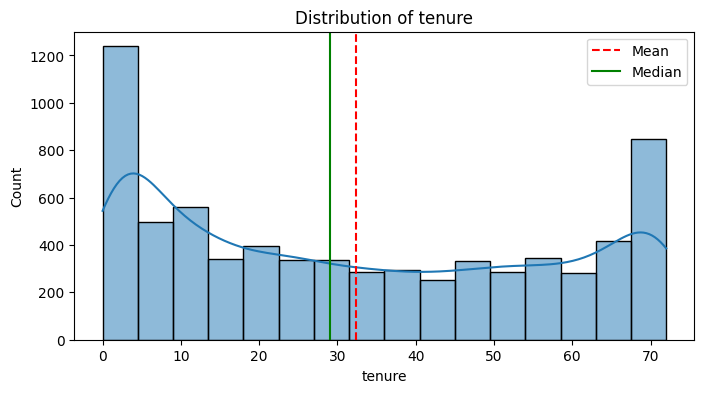

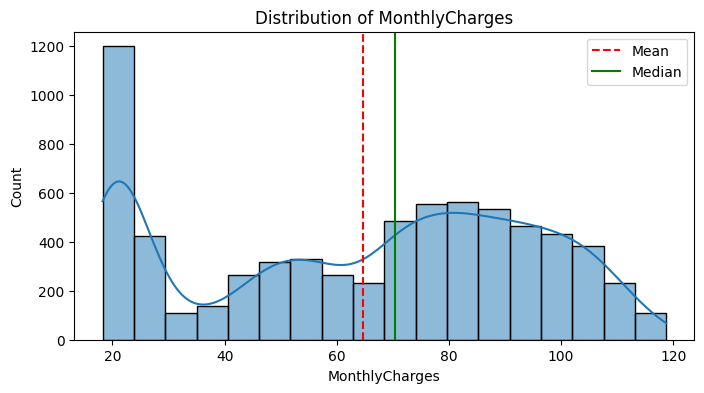

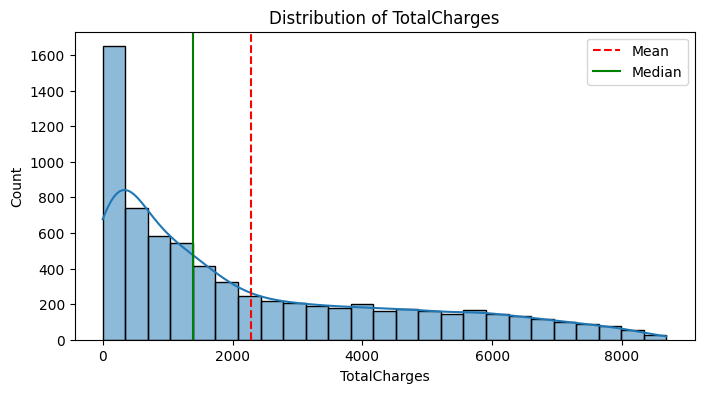

In [ ]:
numerical_features=["tenure","MonthlyCharges","TotalCharges"]
for col in numerical_features:
  histogram(df,col)


#### Boxplot of numerical columns

In [ ]:
def plot_boxplot(df,column):
  plt.figure(figsize=(8,4))
  sns.boxplot(y=df[column],linecolor='auto')
  plt.title(f" Box plot of {column}")
  plt.show()

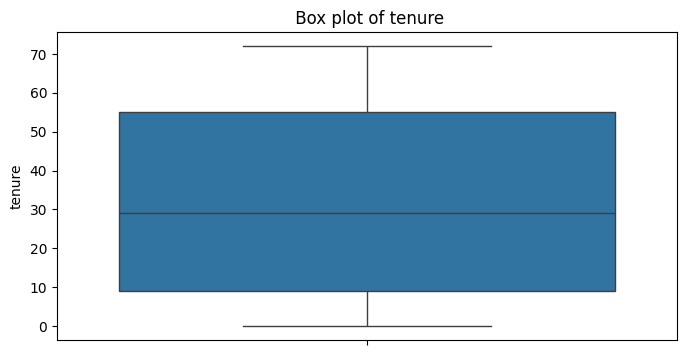

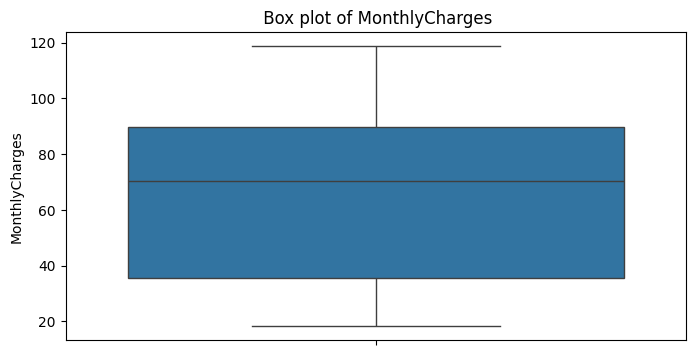

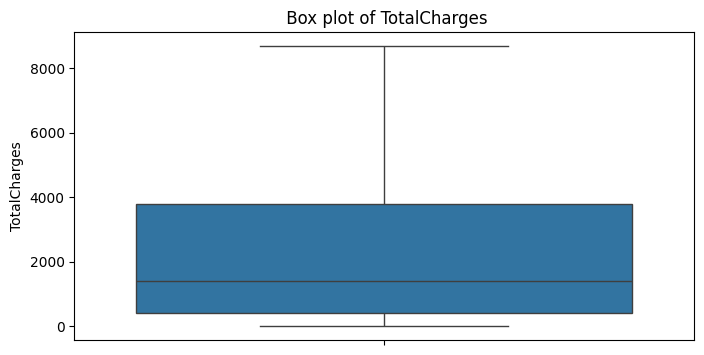

In [ ]:
for col in numerical_features:
  plot_boxplot(df,col)

* All numerical features show stable distributions without any extreme values. The boxplots do not indicate the presence of outliers, which means the data is already well-behaved. No additional cleaning or outlier treatment is required.

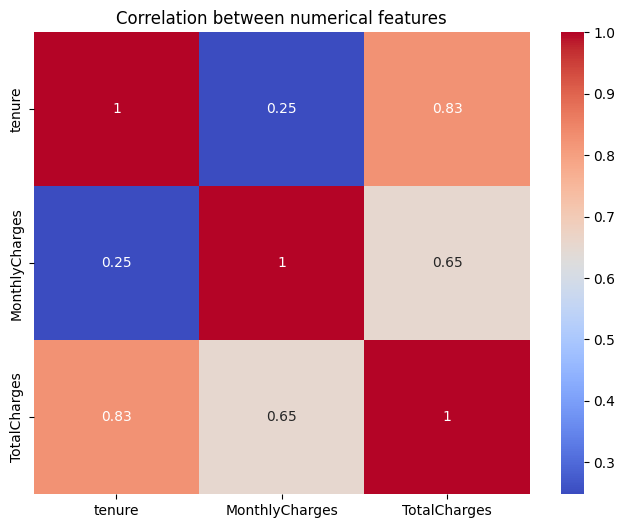

In [ ]:
#Let's find correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm")
plt.title("Correlation between numerical features")
plt.show()

* As you can see there is relation between tenure and TotalCharges

# Categorical Columns - Analysis

In [ ]:
cat_columns=df.select_dtypes(include="object").columns.to_list()
cat_columns


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

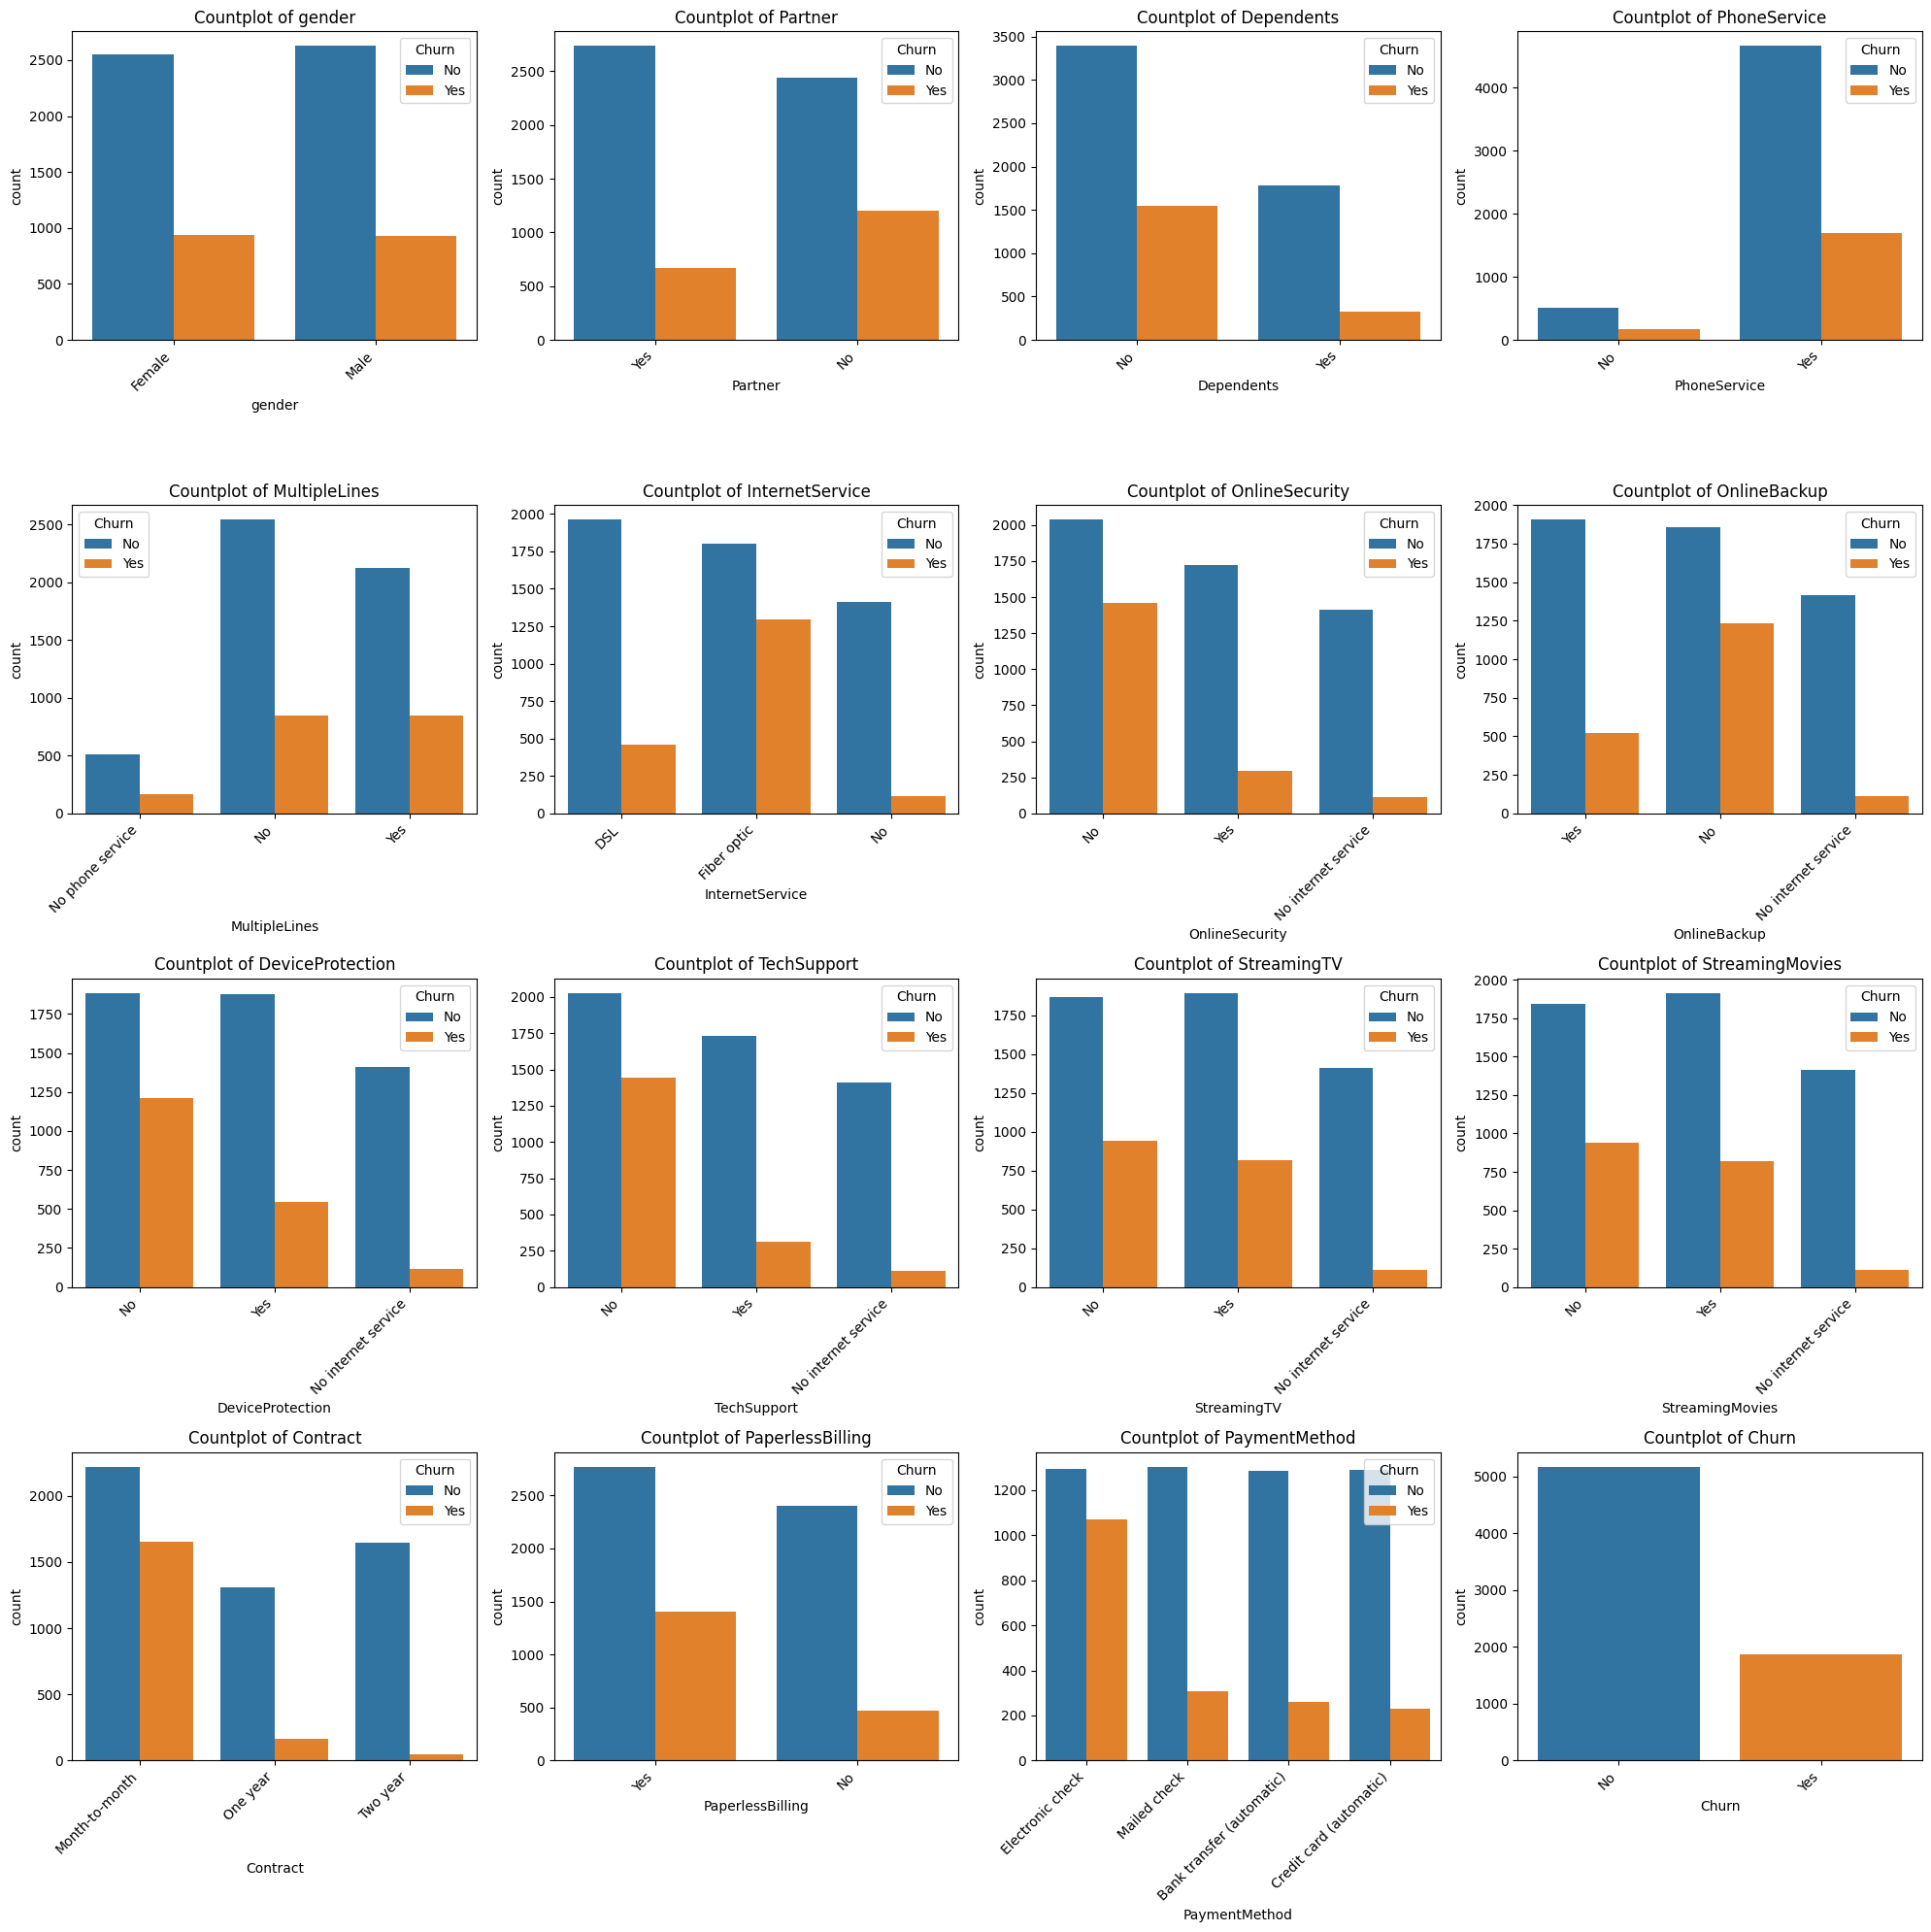

In [ ]:
import math

# Calculate the number of rows and columns for subplots
num_cols = len(cat_columns)
num_rows = math.ceil(num_cols / 4) # Assuming 4 columns per row for better visualization

plt.figure(figsize=(20, 5 * num_rows)) # Adjust figure size dynamically
for i, col in enumerate(cat_columns):
  plt.subplot(num_rows, 4, i + 1)
  sns.countplot(x=df[col], hue=df["Churn"])
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

### Insights from Categorical Feature Analysis:

*   **Gender**: Churn rates are relatively similar across both male and female customers.
*   **Partner & Dependents**: Customers with partners and dependents show a lower churn rate compared to those without, suggesting that these factors contribute to customer loyalty.
*   **PhoneService & MultipleLines**: Phone service itself doesn't significantly impact churn. However, customers with multiple lines have a slightly higher churn rate.
*   **InternetService**: Customers using **Fiber optic** internet service have a notably higher churn rate, indicating potential dissatisfaction with this service. Conversely, customers with no internet service have a very low churn rate.
*   **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport**: Customers who do not subscribe to these additional services (Online Security, Online Backup, Device Protection, Tech Support) tend to churn more, highlighting the importance of these add-ons for retention.
*   **StreamingTV & StreamingMovies**: The presence of streaming TV or movies services doesn't show a strong correlation with churn, as rates are similar for both subscribers and non-subscribers.
*   **Contract**: Customers on **Month-to-month** contracts exhibit a significantly higher churn rate compared to those on one-year or two-year contracts. Longer-term contracts are a strong indicator of customer retention.
*   **PaperlessBilling**: Customers opting for paperless billing have a higher propensity to churn.
*   **PaymentMethod**: **Electronic check** users show a higher churn rate than customers using other payment methods.

# Data Preprocessing

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df["Churn"]=df["Churn"].replace({"Yes":1,"No":0})

In [ ]:
df["Churn"]=df["Churn"].astype("int")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
#identify columns with object datatype

object_features=df.select_dtypes(include="object").columns
object_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
#initialize a dictionary to store encoders
encoders={}

for col in object_features:
  encoder=LabelEncoder()
  df[col]=encoder.fit_transform(df[col])
  encoders[col]=encoder
encoders


#save the encoders to a pickle file so we can reuse them later.
import pickle
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)



In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
#splitting the features and target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#splitting training and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


#### Imbalance Data >>
* When one class has very high percentage as compare to other class

In [ ]:
#SMOTE(Synthetic Minarity Oversampling Technique)

smote=SMOTE(random_state=42)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

,count
Churn,
0,4138
1,1496


#Model Training

In [ ]:
#Training with default hyperparameter

In [ ]:
#Dictionary of models

models={"Decision Tree":DecisionTreeClassifier(random_state=42),
        "Random Forest":RandomForestClassifier(random_state=42),
        "XgBoost":XGBClassifier(random_state=42)}



In [ ]:
#5-fold cross validation

cv_scores={}

for model_name,model in models.items():
  print(f"training {model_name} with default parameters")
  scores=cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} CV scores:{np.mean(scores):.2f}")
  print("-"*50)

training Decision Tree with default parameters
Decision Tree CV scores:0.78
--------------------------------------------------
training Random Forest with default parameters
Random Forest CV scores:0.84
--------------------------------------------------
training XgBoost with default parameters
XgBoost CV scores:0.83
--------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XgBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

#### Random Forest Classifier gives the highest accuracy

In [ ]:
rfc=RandomForestClassifier(random_state=42)

rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

#Model Evaluation

In [ ]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


In [ ]:
#Evaluate on test data

y_pred=rfc.predict(x_test)

print("Accyracy Score \n",accuracy_score(y_test,y_pred))
print("-"*50)
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print("-"*50)
print("Classification Report \n",classification_report(y_test,y_pred))

Accyracy Score 
 0.7785663591199432
--------------------------------------------------
Confusion Matrix 
 [[878 158]
 [154 219]]
--------------------------------------------------
Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [ ]:
model_data={"model":rfc,"features_names":x_train.columns.tolist()}

import pickle
with open("customer_churn_model.pkl","wb") as f:
  pickle.dump(model_data,f)

with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

##### load the saved model and bbuild a predictive system

In [ ]:
with open("customer_churn_model.pkl","rb") as f:
  model_data=pickle.load(f)

loaded_model=model_data["model"]
feature_names=model_data["features_names"]


In [ ]:
print(loaded_model)
print("\n")
print(feature_names)


RandomForestClassifier(random_state=42)


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [ ]:
input_data={
    "gender":"Female",
    "SeniorCitizen":0,
    "Partner":"Yes",
    "Dependents":"No",
    "tenure":1,
    "PhoneService":"No",
    "MultipleLines":"No phone service",
    "InternetService":"DSL",
    "OnlineSecurity":"No",
    "OnlineBackup":"Yes",
    "DeviceProtection":"No",
    "TechSupport":"No",
    "StreamingTV":"No",
    "StreamingMovies":"No",
    "Contract":"Month-to-month",
    "PaperlessBilling":"Yes",
    "PaymentMethod":"Electronic check",
    "MonthlyCharges":29.85,
    "TotalCharges":29.85


}

input_data_df=pd.DataFrame([input_data])
input_data_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85


In [ ]:
#encode all the features

with open("encoders.pkl","rb") as f:
  encoders=pickle.load(f)

for columns,encoder in encoders.items():
  input_data_df[columns]=encoder.transform(input_data_df[columns])




In [ ]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [ ]:
 #make a prediction

 prediction=loaded_model.predict(input_data_df)
 prediction_probability=loaded_model.predict_proba(input_data_df)


 print("Predictions:", prediction)
 print("Prediction Probabilities:", prediction_probability)

 print(f"Prediction {'churn' if prediction[0]=="1" else "No churn"}")

Predictions: [0]
Prediction Probabilities: [[0.78 0.22]]
Prediction No churn


In [ ]:
#Hyperparametre tuning

from sklearn.model_selection import GridSearchCV

param_grid={
    "n_estimators":[100,200,300], #Number of trees in the forest
    "max_depth":[10,20,30,None], #Maximum depth of the tree
    "min_samples_split":[2,5,10] #Minimum number of samples required to split an internal node
}

print(param_grid)

best_model=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,scoring="accuracy")

best_model.fit(x_train_smote,y_train_smote)

print("Best Parameters:",best_model.best_params_)
print("Best Score:",best_model.best_score_)

{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10]}
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8423282543018521
